In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

K.clear_session()

Using TensorFlow backend.


In [2]:
input_img = Input(shape=(28,28,1))

In [3]:
# Define encoder architecture
x = Conv2D(16, (3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

In [4]:
# Define decoder architecture
x = Conv2D(8,(3,3),   activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8, (3,3),  activation='relu', padding='same')(x)
x = x = UpSampling2D((2,2))(x)
x = Conv2D(16, (3,3), activation='relu', padding='valid')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

In [5]:
# Define autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0   

In [6]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [7]:
from keras.callbacks import TensorBoard

hist = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 83s 1ms/step - loss: 0.2330 - val_loss: 0.1533
Epoch 2/5
60000/60000 [==============================] - 68s 1ms/step - loss: 0.1393 - val_loss: 0.1284
Epoch 3/5
60000/60000 [==============================] - 50s 840us/step - loss: 0.1252 - val_loss: 0.1200
Epoch 4/5
60000/60000 [==============================] - 51s 853us/step - loss: 0.1189 - val_loss: 0.1155
Epoch 5/5
60000/60000 [==============================] - 50s 835us/step - loss: 0.1149 - val_loss: 0.1119


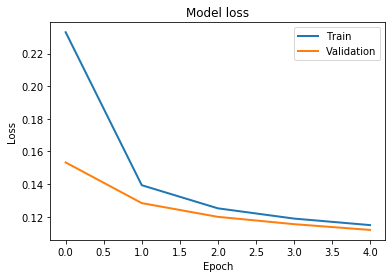

In [9]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], linewidth=2, label='Train')
plt.plot(hist.history['val_loss'], linewidth=2, label='Validation')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [10]:
# Encode and decode some digits
decoded_imgs = autoencoder.predict(x_test)

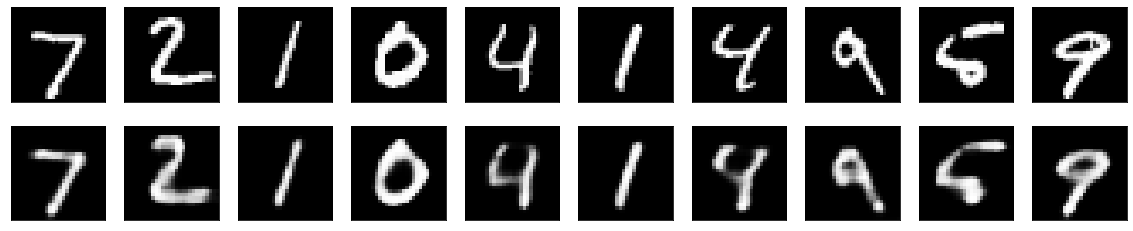

In [11]:
n=10
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()